In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path = '../data/bikeshare/'
data_files = ['2017-q1_trip_history_data.csv', '2017-q2_trip_history_data.csv',
              '2017-q3_trip_history_data.csv', '2017-q4_trip_history_data.csv']

In [4]:
data_df_list = []
for file in data_files:
    full_path = os.path.join(path, file)
    data_df = pd.read_csv(full_path)
    data_df_list.append(data_df)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data_df_list[0].head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,221834,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676854,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356956,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
3,1327901,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
4,1636768,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual


In [9]:
data_df_list[0]['Member type'].value_counts()

Member    528509
Casual    118077
Name: Member type, dtype: int64

In [14]:
data_df_list[0]['Member type'][data_df_list[0]['Member type']=='Member'].count()

528509

In [18]:
member_count_list = []
casual_count_list = []
for data_df in data_df_list:
    member_count = data_df['Member type'][data_df['Member type']=='Member'].count()
    member_count_list.append(member_count)
    casual_count = data_df['Member type'][data_df['Member type']=='Casual'].count()
    casual_count_list.append(casual_count)

In [19]:
member_count_list

[528509, 763483, 825333, 659068]

In [20]:
casual_count_list

[118077, 341034, 366401, 156302]

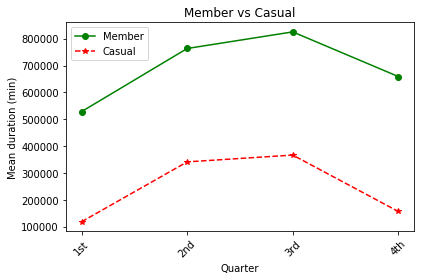

In [21]:
plt.figure()
plt.plot(member_count_list, color='g', linestyle='-', marker='o', label='Member')
plt.plot(casual_count_list, color='r', linestyle='--', marker='*', label='Casual')
plt.title('Member vs Casual')
plt.xticks(range(0, 4), ['1st', '2nd', '3rd', '4th'], rotation=45)
plt.xlabel('Quarter')
plt.ylabel('Mean duration (min)')
plt.legend(loc='best')
plt.tight_layout()

```python
# 数据源同上

"""
    明确任务：比较共享单车用户类别（会员、非会员）的平均骑行时间的趋势
"""
import os
import numpy as np
import matplotlib.pyplot as plt

data_path = './data/bikeshare/'
data_filenames = ['2017-q1_trip_history_data.csv', '2017-q2_trip_history_data.csv',
                  '2017-q3_trip_history_data.csv', '2017-q4_trip_history_data.csv']


def collect_and_process_data():
    """
        Step 1+2: 数据获取，数据处理
    """
    cln_data_arr_list = []
    for data_filename in data_filenames:
        data_file = os.path.join(data_path, data_filename)
        data_arr = np.loadtxt(data_file, delimiter=',', dtype='str', skiprows=1)

        # 去掉双引号
        cln_data_arr = np.core.defchararray.replace(data_arr, '"', '')
        cln_data_arr_list.append(cln_data_arr)

    return cln_data_arr_list


def get_mean_duraion_by_type(data_arr_list, member_type):
    """
        Step 3: 数据分析
    """
    mean_duration_list = []
    for data_arr in data_arr_list:
        bool_arr = data_arr[:, -1] == member_type
        filtered_arr = data_arr[bool_arr]

        mean_duration = np.mean(filtered_arr[:, 0].astype('float') / 1000 / 60)
        mean_duration_list.append(mean_duration)

    return mean_duration_list


def save_and_show_results(member_mean_duration_list, casual_mean_duration_list):
    """
        结果展示
    """
    # 1. 信息输出
    for idx in range(len(member_mean_duration_list)):
        member_mean_duraion = member_mean_duration_list[idx]
        casual_mean_duration = casual_mean_duration_list[idx]
        print('第{}个季度，会员平均骑行时长：{:.2f}分钟，非会员平均骑行时长：{:.2f}分钟。'.format(
            idx + 1, member_mean_duraion, casual_mean_duration))

    # 2. 分析结果保存
    # 构造多维数组
    mean_duraion_arr = np.array([member_mean_duration_list, casual_mean_duration_list]).transpose()
    np.savetxt('./mean_duration.csv', mean_duraion_arr, delimiter=',',
               header='Member Mean Duraion, Casual Mean Duraion', fmt='%.4f',
               comments='')

    # 3. 可视化结果保存
    plt.figure()
    plt.plot(member_mean_duration_list, color='g', linestyle='-', marker='o', label='Member')
    plt.plot(casual_mean_duration_list, color='r', linestyle='--', marker='*', label='Casual')
    plt.title('Member vs Casual')
    plt.xticks(range(0, 4), ['1st', '2nd', '3rd', '4th'], rotation=45)
    plt.xlabel('Quarter')
    plt.ylabel('Mean duration (min)')
    plt.legend(loc='best')
    plt.tight_layout()

    plt.savefig('./duration_trend.png')
    plt.show()


def main():
    """
        主函数
    """
    # 数据获取 + 数据处理
    cln_data_arr_list = collect_and_process_data()

    # 数据分析
    # 会员数据分析
    member_mean_duration_list = get_mean_duraion_by_type(cln_data_arr_list, 'Member')
    # 非会员数据分析
    casual_mean_duration_list = get_mean_duraion_by_type(cln_data_arr_list, 'Casual')

    save_and_show_results(member_mean_duration_list, casual_mean_duration_list)


if __name__ == '__main__':
    main()
```